# Building a CDS Survival Curve

Understand what a CDS survival curve is

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.products.credit import *
from financepy.products.rates import *
from financepy.utils import *

####################################################################
# FINANCEPY BETA Version 0.200 - This build:  14 Jul 2021 at 13:18 #
# **** NEW PEP8 COMPLIANT VERSION -- PLEASE UPDATE YOUR CODE  **** #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Build Ibor Curve

In [3]:
valuation_date = Date(20, 12, 2018)
settlement_date = valuation_date.add_weekdays(2)

In [4]:
dcType = DayCountTypes.ACT_360
depo1 = IborDeposit(settlement_date, "1M", 0.022009, dcType)
depo2 = IborDeposit(settlement_date, "2M", 0.022138, dcType)
depo3 = IborDeposit(settlement_date, "3M", 0.021810, dcType)
depo4 = IborDeposit(settlement_date, "6M", 0.020503, dcType)
depo5 = IborDeposit(settlement_date, "12M", 0.019930, dcType)
depos = [depo1,depo2,depo3,depo4,depo5]

swapType = SwapTypes.PAY
dcType = DayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FrequencyTypes.SEMI_ANNUAL
swap1 = IborSwap(settlement_date,"2Y",swapType,0.015910,fixedFreq,dcType)
swap2 = IborSwap(settlement_date,"3Y",swapType,0.014990,fixedFreq,dcType)
swap3 = IborSwap(settlement_date,"4Y",swapType,0.014725,fixedFreq,dcType)
swap4 = IborSwap(settlement_date,"5Y",swapType,0.014640,fixedFreq,dcType)
swap5 = IborSwap(settlement_date,"6Y",swapType,0.014800,fixedFreq,dcType)
swap6 = IborSwap(settlement_date,"7Y",swapType,0.014995,fixedFreq,dcType)
swap7 = IborSwap(settlement_date,"8Y",swapType,0.015180,fixedFreq,dcType)
swap8 = IborSwap(settlement_date,"9Y",swapType,0.015610,fixedFreq,dcType)
swap9 = IborSwap(settlement_date,"10Y",swapType,0.0159880,fixedFreq,dcType)
swap10 = IborSwap(settlement_date,"12Y",swapType,0.016430,fixedFreq,dcType)
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

libor_curve = IborSingleCurve(valuation_date, depos, [], swaps)

# Build a CDS Curve

In [5]:
cds1 = CDS(settlement_date, "1Y", 0.0200)
cds2 = CDS(settlement_date, "2Y", 0.0220)
cds3 = CDS(settlement_date, "3Y", 0.0250)
cds4 = CDS(settlement_date, "4Y", 0.0275)
cds5 = CDS(settlement_date, "5Y", 0.0290)
cds6 = CDS(settlement_date, "7Y", 0.0300)
cds7 = CDS(settlement_date, "10Y", 0.0310)
cds8 = CDS(settlement_date, "15Y", 0.0315)

In [6]:
cdss = [cds1, cds2, cds3, cds4, cds5, cds6, cds7, cds8]

In [7]:
recovery_rate = 0.40

In [9]:
issuer_curve = CDSCurve(valuation_date, cdss, libor_curve, recovery_rate)

## Examine the Survival Curve

In [10]:
print(issuer_curve._times)

[ 0.          1.24931507  2.24931507  3.24931507  4.24931507  5.25205479
  7.25205479 10.25479452 15.25753425]


In [11]:
print(issuer_curve._values)

[1.         0.95866355 0.91964676 0.87076708 0.81836916 0.76922779
 0.6872725  0.57704068 0.43559196]


In [12]:
times = np.linspace(0.0,20.0,10)

In [13]:
times

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

In [14]:
survival_probs = issuer_curve.survival_prob(times)

In [15]:
survival_probs

array([1.        , 0.92068261, 0.80856647, 0.71031227, 0.62480222,
       0.54992325, 0.4853481 , 0.42835573, 0.37805574, 0.33366225])

Text(0, 0.5, 'Survival Probability')

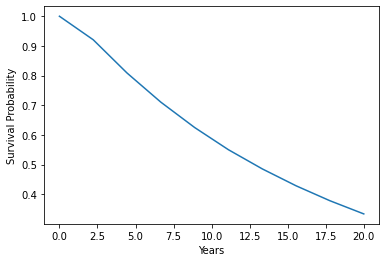

In [16]:
plt.plot(times, survival_probs)
plt.xlabel("Years")
plt.ylabel("Survival Probability")

Copyright (c) 2020 Dominic O'Kane